importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

loading dataset

In [3]:
!wget "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
!unzip "wine+quality.zip"

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
wine = pd.read_csv("winequality-white.csv", sep=';')

In [5]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

description

In [6]:
wine.shape

(4898, 12)

In [7]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [11]:
wine=wine.reset_index(drop=True)

In [12]:
wine=wine.drop_duplicates()

In [13]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.019214     0.298959   
volatile acidity          -0.019214          1.000000    -0.163228   
citric acid                0.298959         -0.163228     1.000000   
residual sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free sulfur dioxide       -0.058396         -0.102471     0.091681   
total sulfur dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
quality                   -0.124636         -0.190678     0.007065   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.083620   0.024036            -0.058396   
volatile acidity            0.098340   0.086287            -0.102471   
citric acid                 0.106269   0.132590             0.091681   
residual sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free sulfur dioxide         0.306835   0.101272             1.000000   
total sulfur dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   
quality                    -0.117339  -0.217739             0.010507   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric acid                       0.122845  0.160076 -0.183015   0.049442   
residual sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free sulfur dioxide               0.619437  0.294638 -0.007750   0.037932   
total sulfur dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   
quality                          -0.183356 -0.337805  0.123829   0.053200   

                       alcohol   quality  
fixed acidity        -0.110788 -0.124636  
volatile acidity      0.046815 -0.190678  
citric acid          -0.076514  0.007065  
residual sugar       -0.398167 -0.117339  
chlorides            -0.356928 -0.217739  
free sulfur dioxide  -0.251768  0.010507  
total sulfur dioxide -0.446643 -0.183356  
density              -0.760162 -0.337805  
pH                    0.093095  0.123829  
sulphates            -0.022850  0.053200  
alcohol               1.000000  0.462869  
quality               0.462869  1.000000

In [14]:
wine.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.600000          0.333250     0.336000        6.392500   
4             7.139869          0.382157     0.305229        4.499346   
5             6.921745          0.303306     0.335957        6.941532   
6             6.819435          0.261630     0.338227        5.959787   
7             6.701089          0.265363     0.327358        4.523875   
8             6.609924          0.286794     0.335038        5.056489   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.054300            53.325000            170.600000  0.994884   
4         0.050059            23.127451            124.127451  0.994199   
5         0.052323            36.002979            150.099574  0.995072   
6         0.045178            35.308166            136.460850  0.993722   
7         0.037556            33.851234            122.052975  0.992059   
8         0.036756            35.618321            122.034351  0.991745   
9         0.027400            33.400000            116.000000  0.991460   

               pH  sulphates    alcohol  
quality                                  
3        3.187500   0.474500  10.345000  
4        3.185425   0.476667  10.197712  
5        3.171779   0.482621   9.864182  
6        3.196029   0.492355  10.646122  
7        3.228462   0.502859  11.515844  
8        3.235115   0.485878  11.880153  
9        3.308000   0.466000  12.180000

data analysis

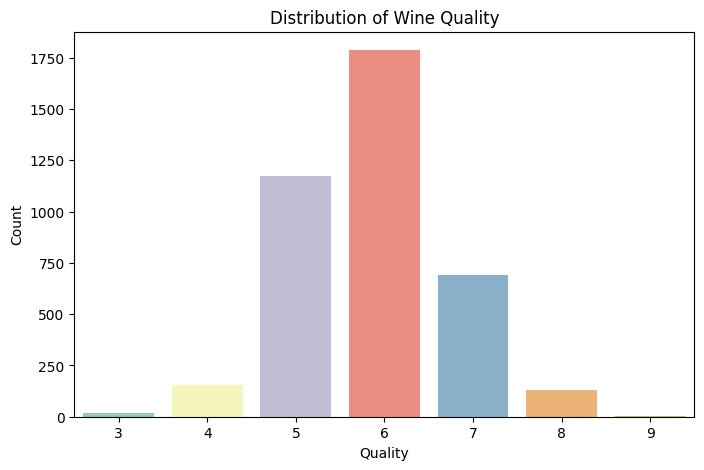

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=wine, x='quality', palette="Set3")
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='quality'>

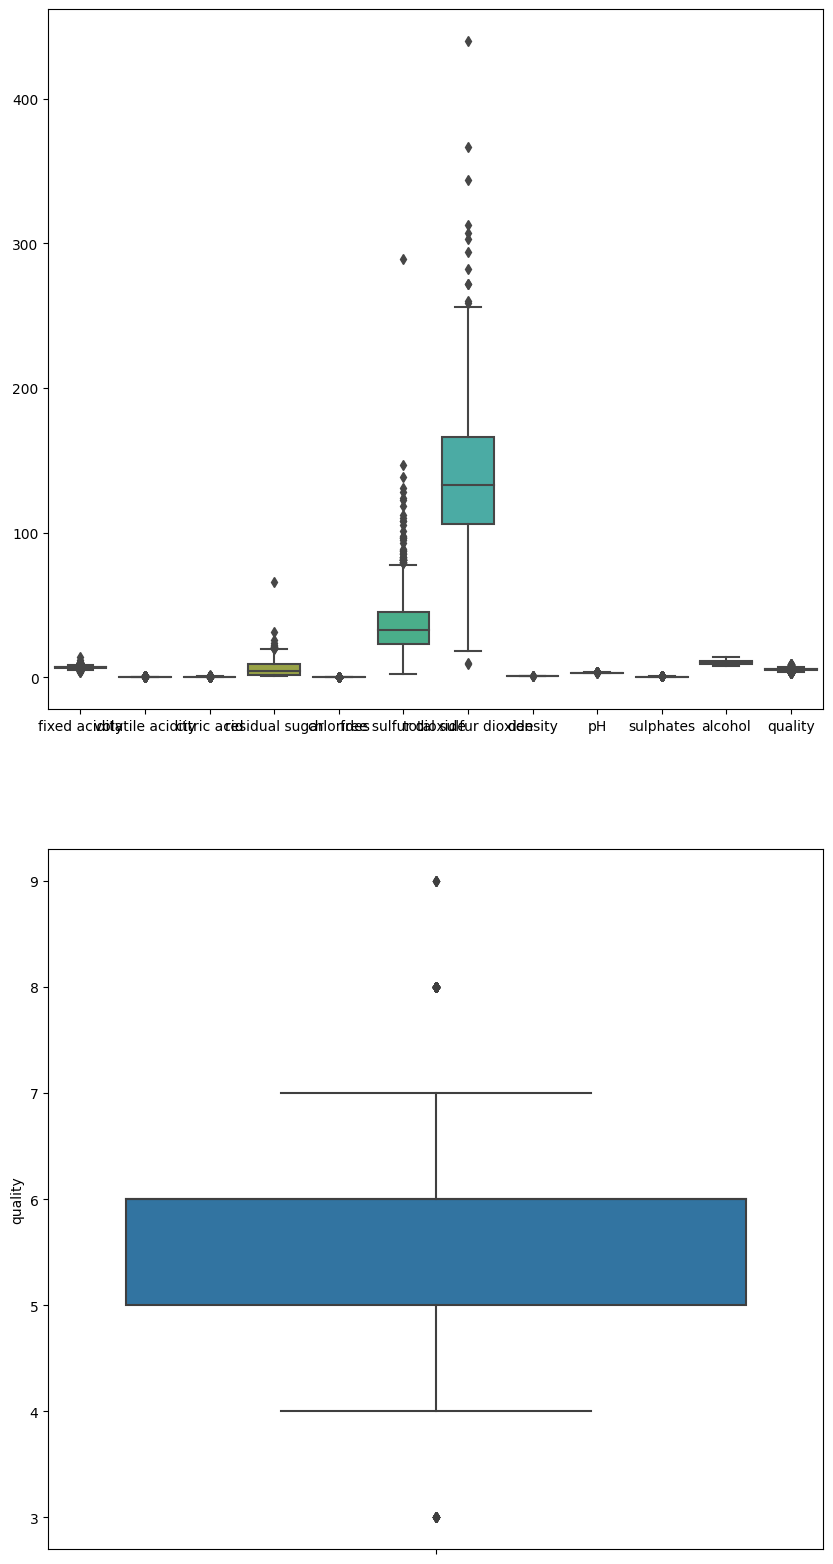

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=wine,orient="v",ax=axes[0])
sns.boxplot(data=wine,y="quality",orient="pH",ax=axes[1])

Text(0.5, 1.0, 'Correlation with Quality')

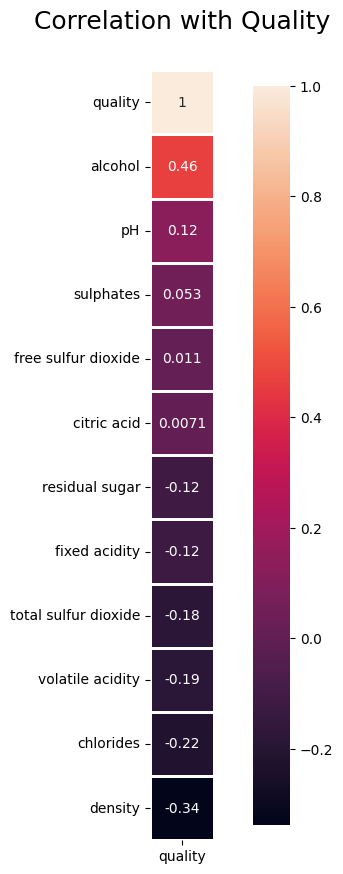

In [17]:
plt.figure(figsize=(10, 10))
correlations = pd.DataFrame(wine.corr()["quality"].sort_values(ascending=False))
sns.heatmap(correlations,annot=True,square=True,linewidth=2,cbar_kws={'shrink':0.96})
plt.title('Correlation with Quality',fontsize=18, pad=30)

Text(0.5, 1.0, 'Correlation with Alcohol')

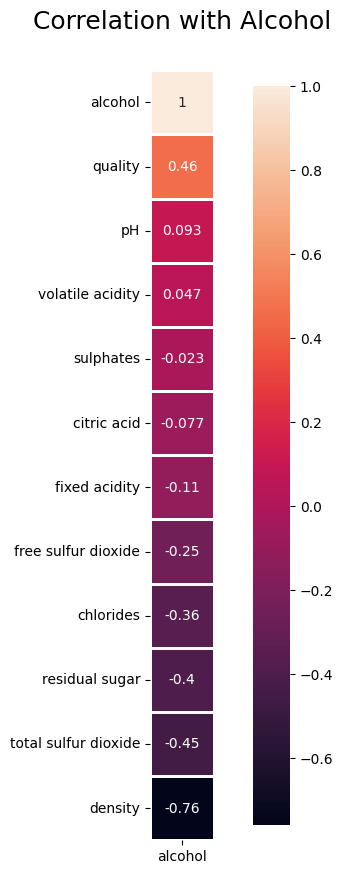

In [18]:
plt.figure(figsize=(10, 10))
correlations = pd.DataFrame(wine.corr()["alcohol"].sort_values(ascending=False))
sns.heatmap(correlations,annot=True,square=True,linewidth=2,cbar_kws={'shrink':0.96})
plt.title('Correlation with Alcohol',fontsize=18, pad=30)

Text(0.5, 1.0, 'Correlation Matrix')

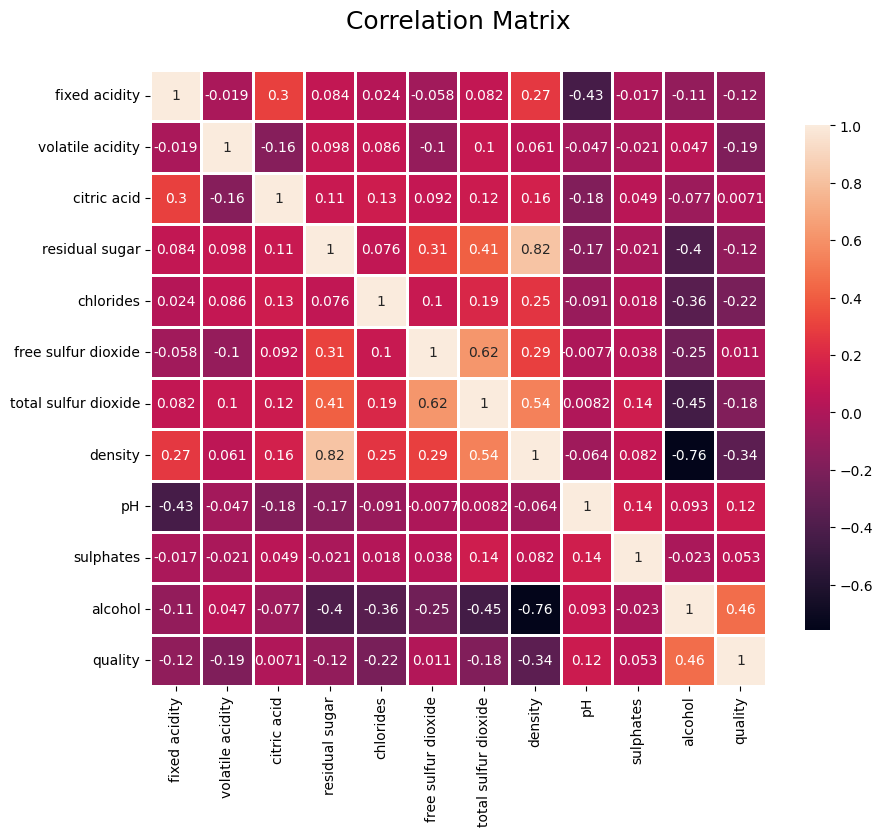

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(),annot=True,square=True,linewidth=2,cbar_kws={'shrink':0.82})
plt.title('Correlation Matrix',fontsize=18, pad=30)

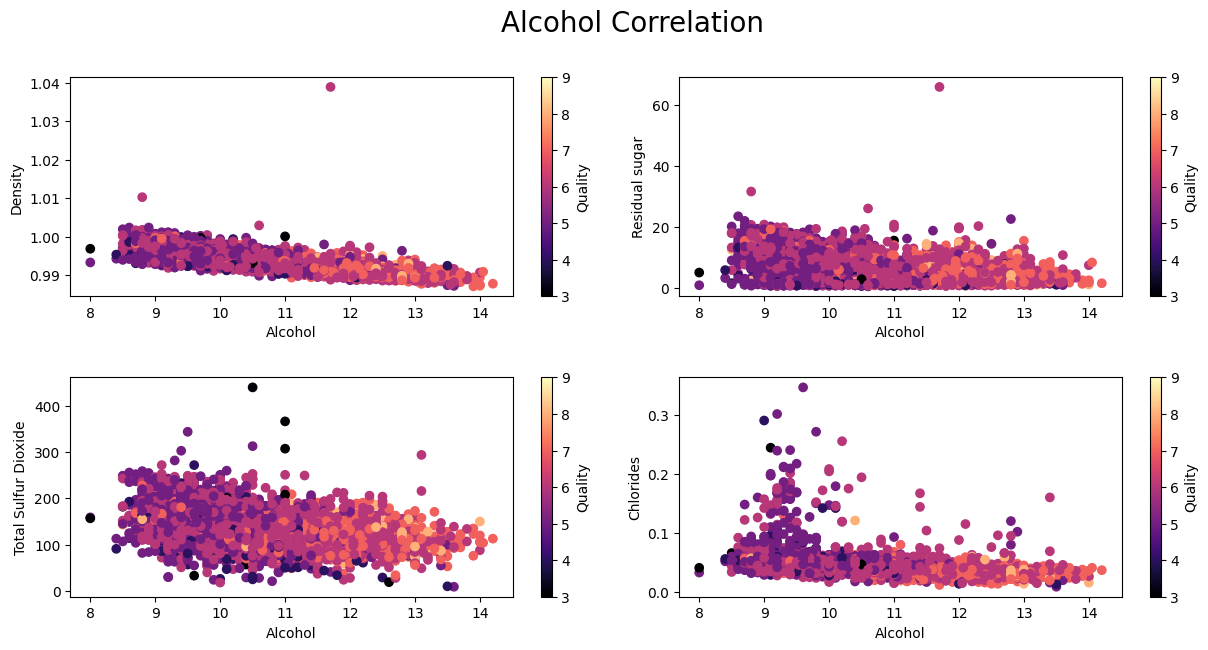

In [20]:
plt.rcParams["figure.figsize"] = (15,6.75)

plt.subplot(2,2,1)
plt.scatter(x=wine['alcohol'],y=wine['density'],c=wine['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol')
plt.ylabel('Density')

plt.subplots_adjust(wspace=0.1,hspace=0.37)
plt.suptitle('Alcohol Correlation',fontsize=20)

plt.subplot(2,2,2)
plt.scatter(x=wine['alcohol'],y=wine['residual sugar'],c=wine['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol')
plt.ylabel('Residual sugar')

plt.subplot(2,2,3)
plt.scatter(wine['alcohol'],wine['total sulfur dioxide'],c=wine['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol')
plt.ylabel('Total Sulfur Dioxide')

plt.subplot(2,2,4)
plt.scatter(wine['alcohol'],wine['chlorides'],c=wine['quality'],cmap='magma')
plt.colorbar(label="Quality", orientation="vertical")
plt.xlabel('Alcohol')
plt.ylabel('Chlorides')
plt.show()

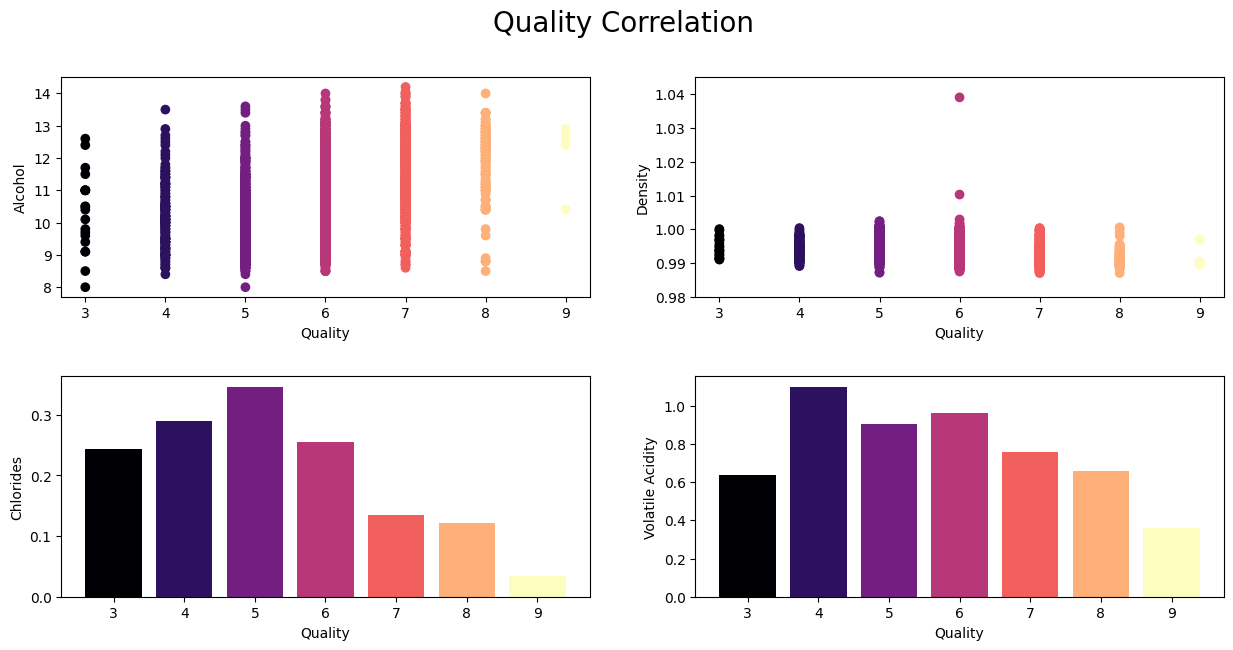

In [24]:
my_cmap = plt.get_cmap("magma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.rcParams["figure.figsize"] = (15,6.75)

plt.subplot(2,2,1)
plt.scatter(wine['quality'], wine['alcohol'],color=my_cmap(rescale(wine['quality'])))
plt.xlabel('Quality')
plt.ylabel('Alcohol')

plt.subplots_adjust(wspace=0.2,hspace=0.36)
plt.suptitle('Quality Correlation',fontsize=20)

plt.subplot(2,2,2)
plt.scatter(wine['quality'], wine['density'],color=my_cmap(rescale(wine['quality'])))
plt.ylim(0.98,1.045)
plt.xlabel('Quality')
plt.ylabel('Density')

plt.subplot(2,2,3)
plt.bar(wine['quality'], wine['chlorides'],color=my_cmap(rescale(wine['quality'])))
plt.xlabel('Quality')
plt.ylabel('Chlorides')

plt.subplot(2,2,4)
plt.bar(wine['quality'], wine['volatile acidity'],color=my_cmap(rescale(wine['quality'])))
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

plt.show()

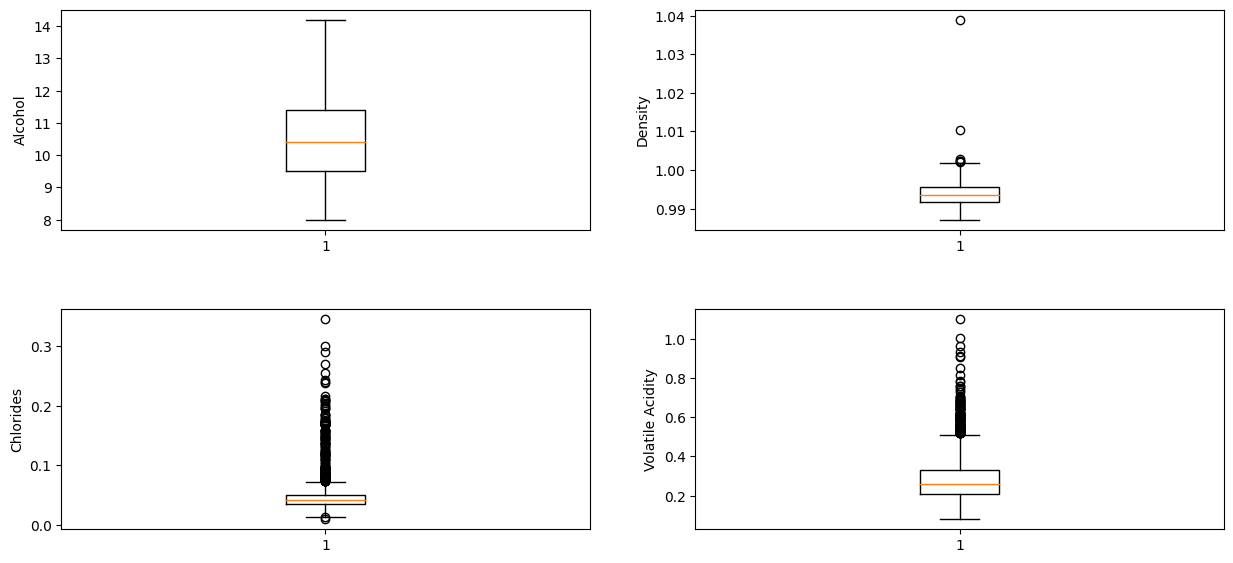

In [25]:
plt.subplot(2,2,1)
plt.boxplot(wine['alcohol'])
plt.ylabel('Alcohol')

plt.subplots_adjust(wspace=0.2,hspace=0.36)

plt.subplot(2,2,2)
plt.boxplot(wine['density'])
plt.ylabel('Density')

plt.subplot(2,2,3)
plt.boxplot(wine['chlorides'])
plt.ylabel('Chlorides')

plt.subplot(2,2,4)
plt.boxplot(wine['volatile acidity'])
plt.ylabel('Volatile Acidity')
plt.show()

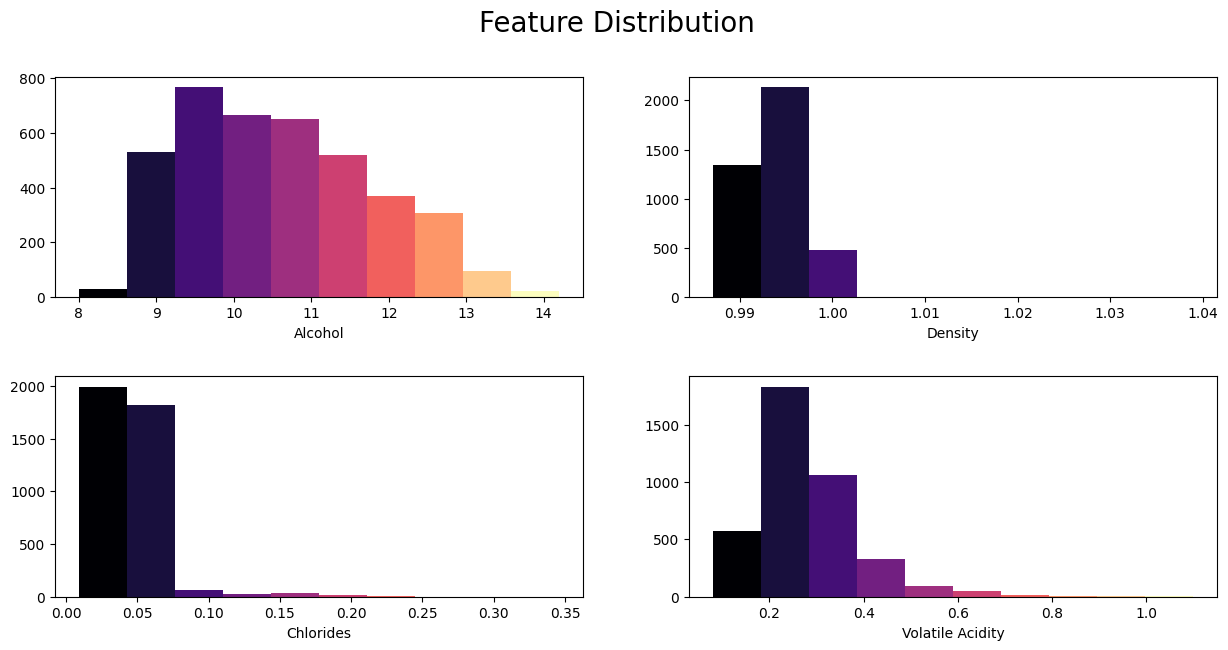

In [26]:
plt.subplot(2,2,1)
n, bins, patches = plt.hist(wine['alcohol'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Alcohol')

plt.subplots_adjust(wspace=0.2,hspace=0.36)
plt.suptitle('Feature Distribution',fontsize=20)

plt.subplot(2,2,2)
n, bins, patches = plt.hist(wine['density'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Density')

plt.subplot(2,2,3)
n, bins, patches = plt.hist(wine['chlorides'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Chlorides')

plt.subplot(2,2,4)
n, bins, patches = plt.hist(wine['volatile acidity'])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', my_cmap(c))
plt.xlabel('Volatile Acidity')
plt.show()

wine.to_csv('Cleaned data.csv',index=False)

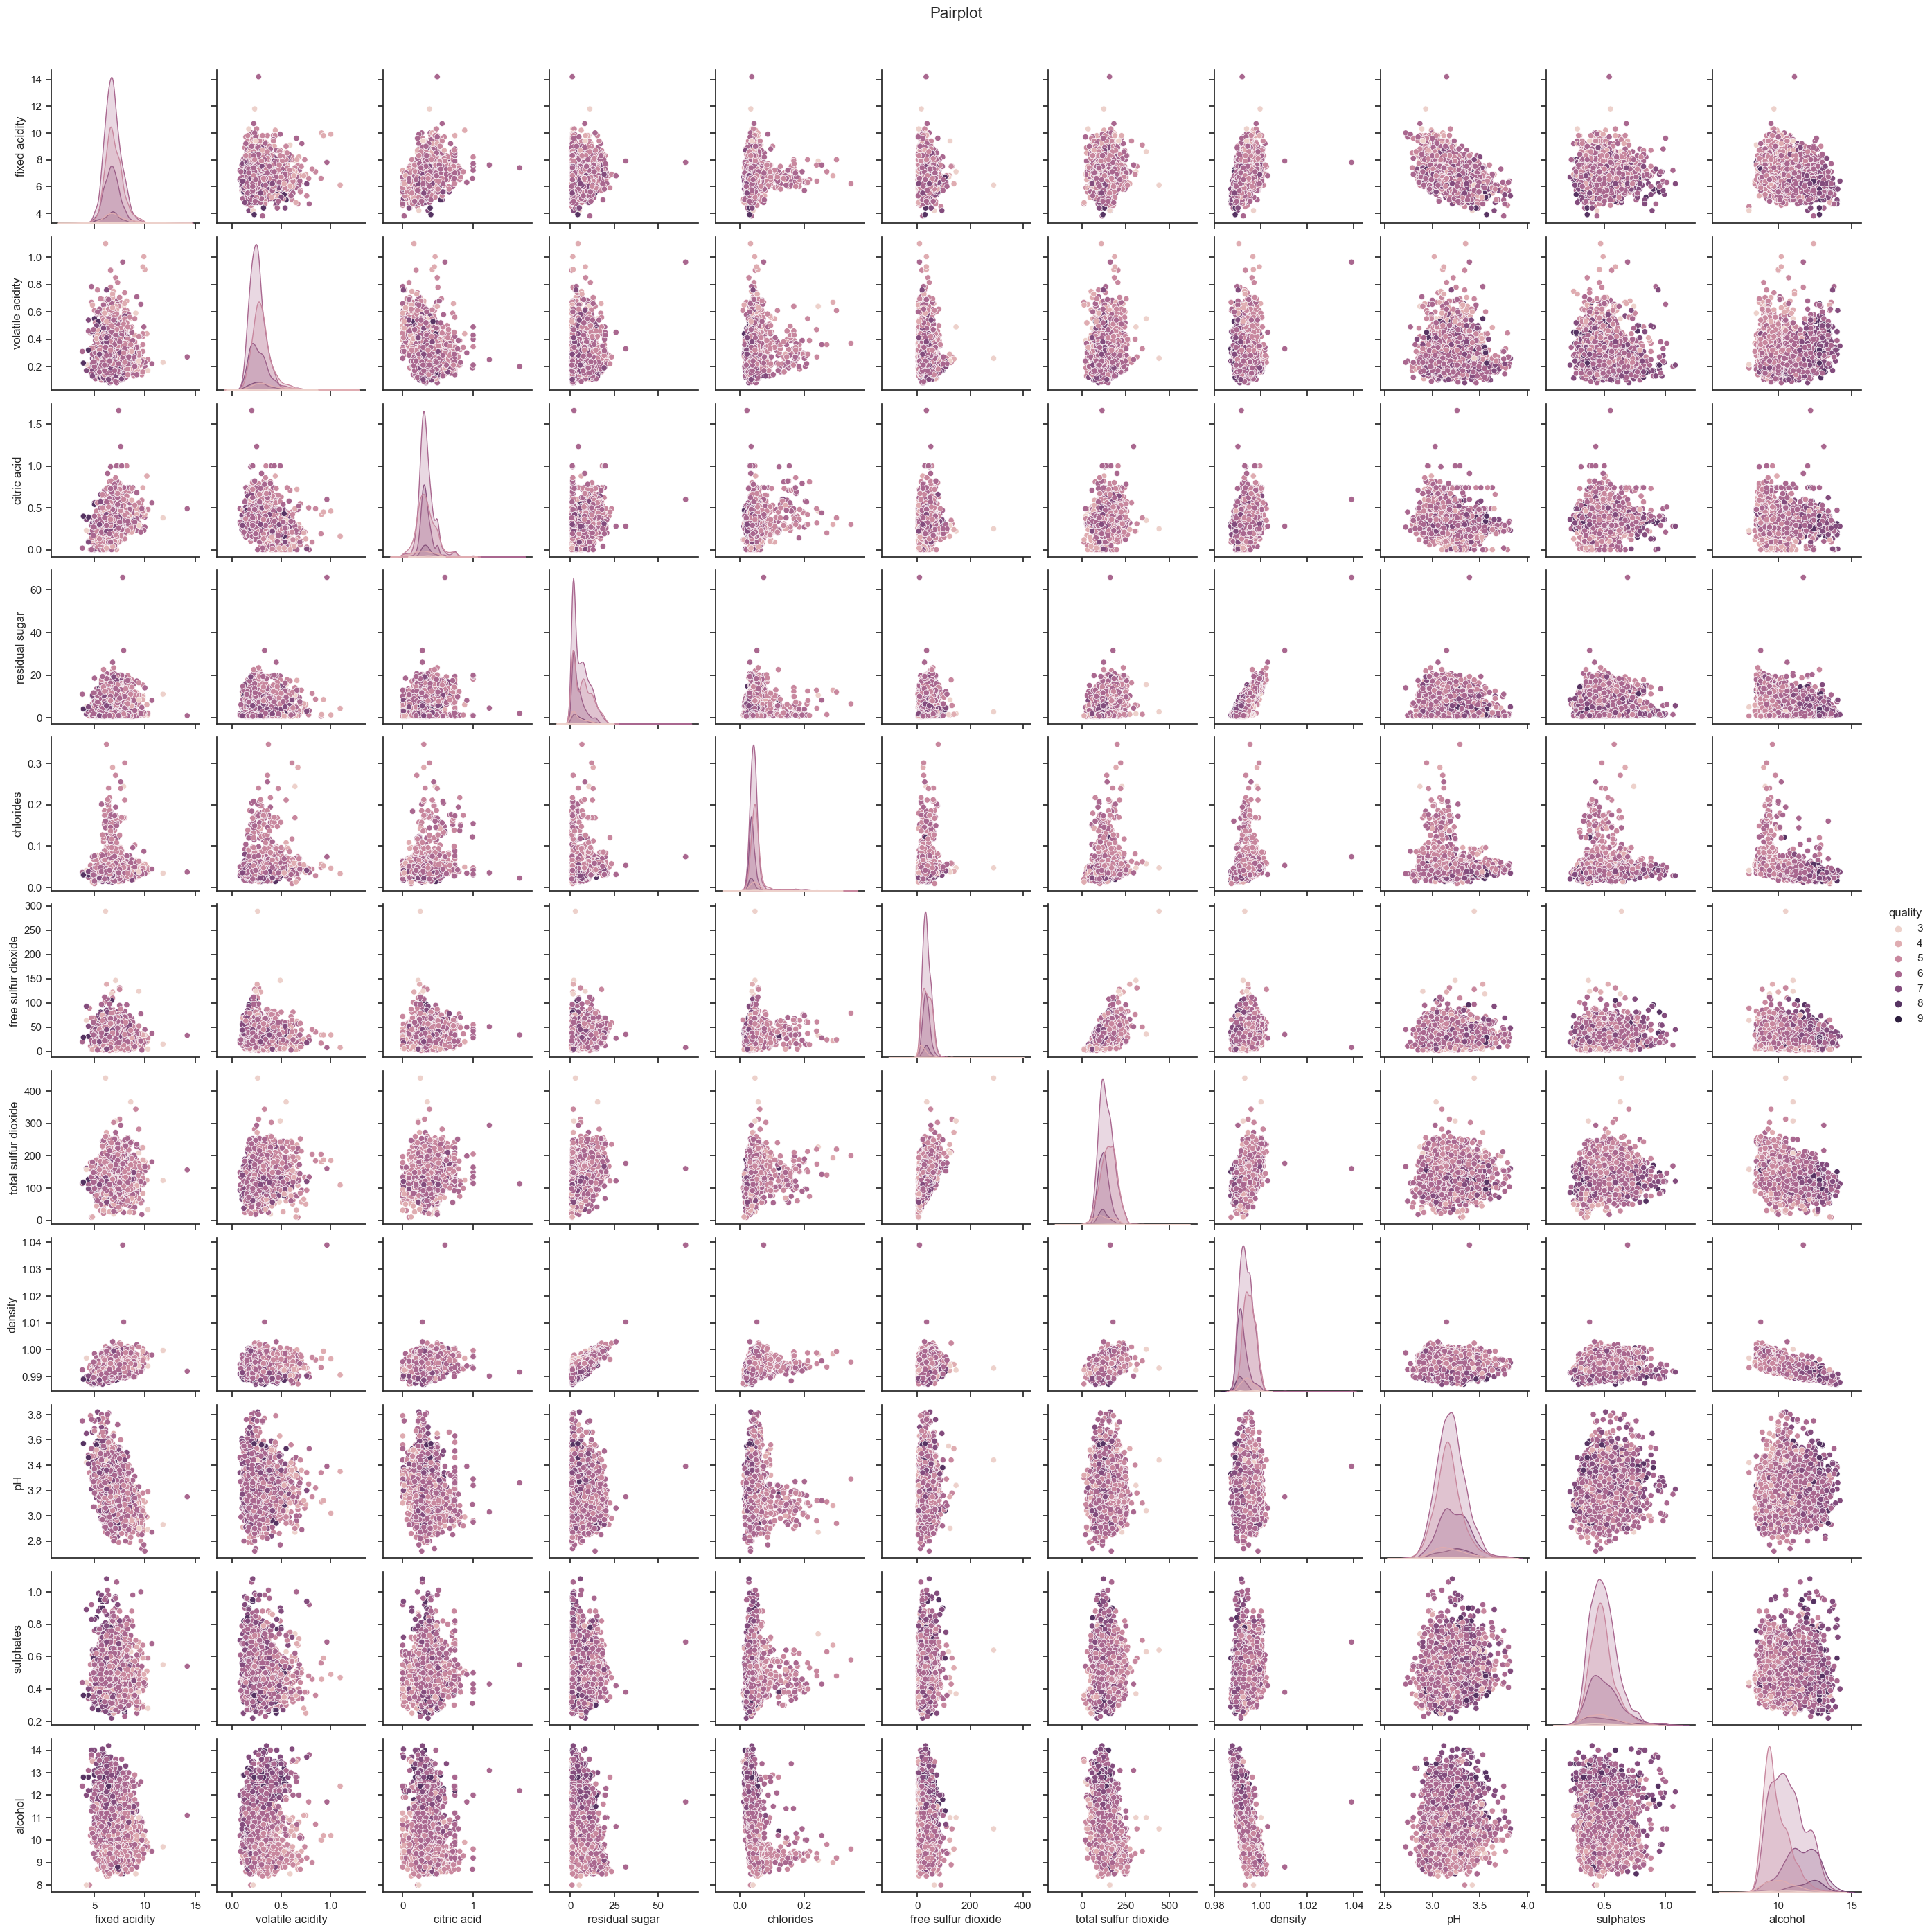

In [ ]:
sns.set(style="ticks")
sns.pairplot(wine,diag_kind="kde",markers="o",hue="quality")
plt.suptitle("Pairplot",y=1.02,fontsize=16)
plt.show()

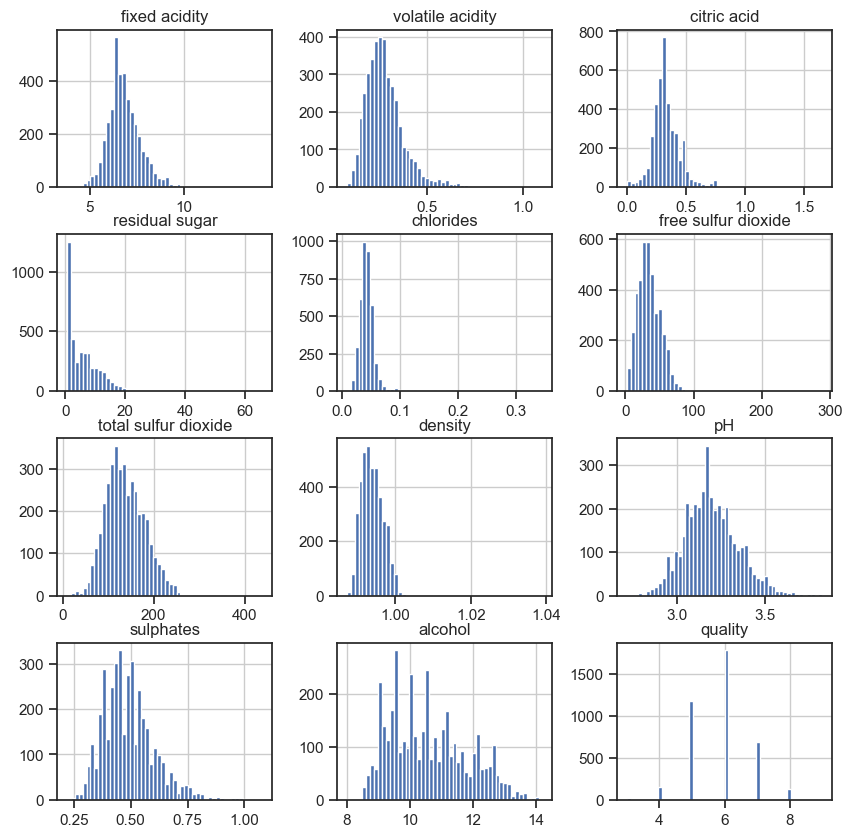

In [ ]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: xlabel='quality', ylabel='Density'>

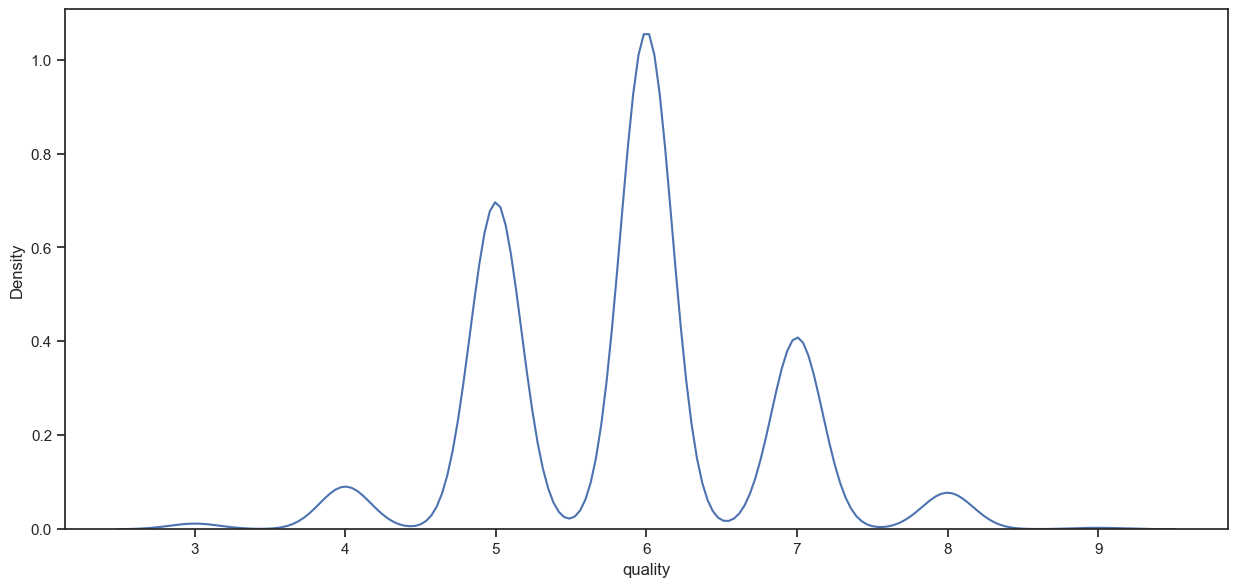

In [ ]:
sns.kdeplot(wine.query('quality>2').quality)

C:\Users\HP\AppData\Local\Temp\ipykernel_14712\807557525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

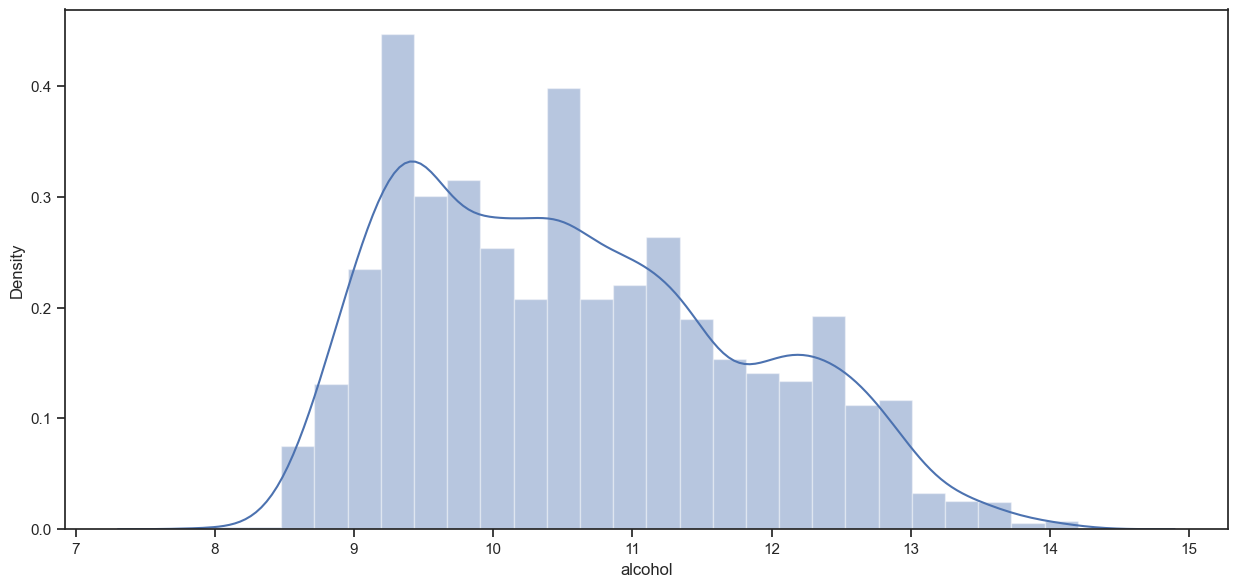

In [ ]:
sns.distplot(wine['alcohol'])

outliers

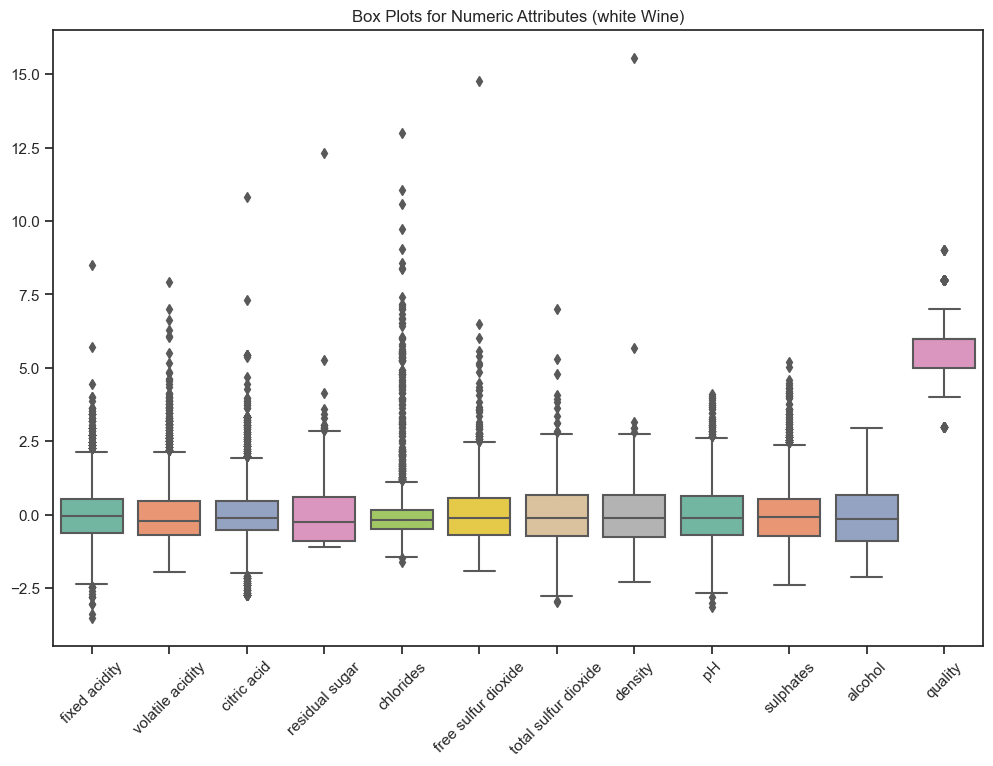

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine, orient="vertical", palette="Set2")
plt.title("Box Plots for Numeric Attributes (white Wine)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("First few rows of the white Wine dataset:")
print(wine.head())
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outlier_mask = ((wine < (Q1 - threshold * IQR)) | (wine > (Q3 + threshold * IQR))).any(axis=1)
white_wine_no_outliers = wine[~outlier_mask]

First few rows of the white Wine dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  


In [ ]:
print("First few rows of the white Wine dataset without outliers:")
print(white_wine_no_outliers.head())

First few rows of the white Wine dataset without outliers:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
1    

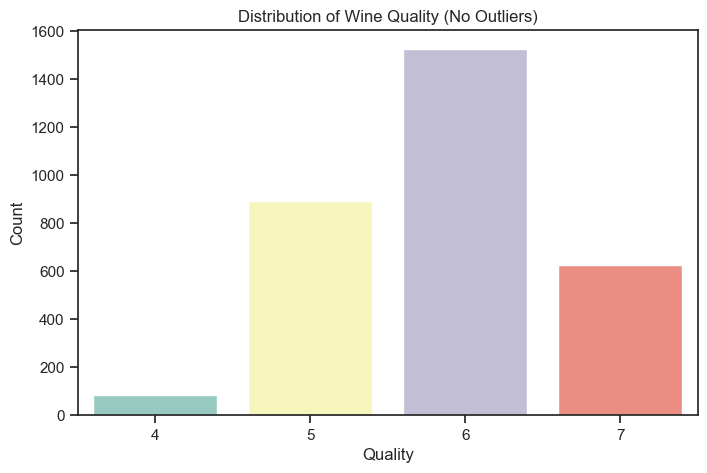

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=white_wine_no_outliers, x='quality', palette="Set3")
plt.title("Distribution of Wine Quality (No Outliers)")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

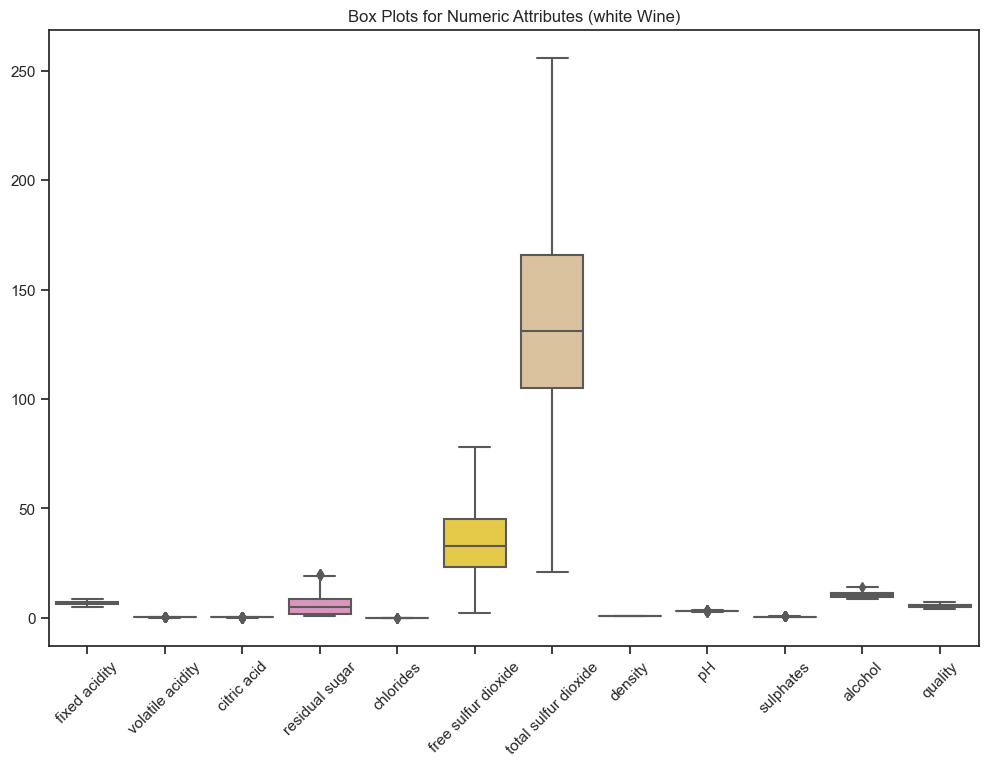

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=white_wine_no_outliers, orient="vertical", palette="Set2")
plt.title("Box Plots for Numeric Attributes (white Wine)")
plt.xticks(rotation=45)
plt.show()

feature engineering

In [ ]:
scaler=StandardScaler()
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
wine[features] = scaler.fit_transform(wine[features])

numeric_features = wine.select_dtypes(include=['float64']).columns.tolist()

wine[numeric_features] = scaler.fit_transform(wine[numeric_features])

print("First few rows of the standardized Red Wine dataset:")
print(wine.head())

First few rows of the standardized Red Wine dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.185352         -0.101889     0.209651        3.041572  -0.039181   
1      -0.622262          0.188179     0.046294       -0.887634   0.133981   
2       1.454460         -0.005199     0.536367        0.202669   0.177271   
3       0.416099         -0.488646    -0.117064        0.531817   0.523594   
6      -0.737636          0.381558    -1.423927        0.223241  -0.039181   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.587571              0.760754  2.482748 -1.289928  -0.355488   
1            -1.213933             -0.120433  0.072470  0.689924  -0.003092   
2            -0.284124             -0.932053  0.451228  0.425944  -0.443587   
3             0.703797              1.131781  0.623391 -0.036022  -0.795984   
6            -0.284124             -0.027677  0.382363 -0.102017  -0.179290   

   

splitting dataset

In [ ]:
X = wine.drop(columns=['quality', 'alcohol'])  # Exclude 'quality' and 'alcohol' columns
Y = wine['alcohol'] 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Model Building

We have implemented and trained multiple machine learning models, including Linear Regression, Random Forest Regression, and Gradient Boosting Regression, to predict wine quality. The model's performance is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R2).

linear regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

lr_mse = mean_squared_error(Y_test, Y_pred)
lr_mae = mean_absolute_error(Y_test, Y_pred)
lr_r2 = r2_score(Y_test, Y_pred)
lr_train = linear_model.score(X_train, Y_train)
lr_test = linear_model.score(X_test, Y_test)

print("Training Accuracy :", lr_train)
print("Testing Accuracy :", lr_test)
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R2):", lr_r2)

Training Accuracy : 0.8500159239461068
Testing Accuracy : 0.8873016540112716
Mean Squared Error (MSE): 0.1146881327254739
Mean Absolute Error (MAE): 0.25219122431157887
R-squared (R2): 0.8873016540112716


In [ ]:
from sklearn.feature_selection import RFE

a = wine.drop(columns=['quality'])  # Exclude the 'quality' column
b = wine['quality']

model = LinearRegression()

num_features_to_select = 5 
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
fit = rfe.fit(a, b)

# Print the ranking of features
print("Feature Ranking:")
for i in range(len(a.columns)):
    print(f"Feature {a.columns[i]}: {fit.ranking_[i]}")

# Get the selected features
selected_features = a.columns[rfe.support_]
print("Selected Features:", selected_features)


Feature Ranking:
Feature fixed acidity: 4
Feature volatile acidity: 1
Feature citric acid: 5
Feature residual sugar: 1
Feature chlorides: 7
Feature free sulfur dioxide: 2
Feature total sulfur dioxide: 6
Feature density: 1
Feature pH: 1
Feature sulphates: 3
Feature alcohol: 1
Selected Features: Index(['volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol'], dtype='object')


random forest regression

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, y_pred)
rf_mae = mean_absolute_error(Y_test, y_pred)
rf_r2 = r2_score(Y_test, y_pred)
rf_train= rf_model.score(X_train, Y_train)
rf_test=rf_model.score(X_test, Y_test)

print("Training Accuracy :",rf_train)
print("Testing Accuracy :", rf_test)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)

Training Accuracy : 0.985925464060755
Testing Accuracy : 0.8890973986790405
Mean Squared Error (MSE): 0.11286068263300544
Mean Absolute Error (MAE): 0.24043616248937072
R-squared (R2): 0.8890973986790405


decision tree regression

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
y_pred = tree_model.predict(X_test)

dt_mse = mean_squared_error(Y_test, y_pred)
dt_mae = mean_absolute_error(Y_test, y_pred)
dt_r2 = r2_score(Y_test, y_pred)
dt_train=tree_model.score(X_train, Y_train)
dt_test=tree_model.score(X_test, Y_test)

print("Training Accuracy :", dt_train)
print("Testing Accuracy :", dt_test)
print("Mean Squared Error (MSE):", dt_mse)
print("Mean Absolute Error (MAE):", dt_mae)
print("R-squared (R2):", dt_r2)

Training Accuracy : 0.9999995242163345
Testing Accuracy : 0.7805571834280456
Mean Squared Error (MSE): 0.22331726922747616
Mean Absolute Error (MAE): 0.32853216123452217
R-squared (R2): 0.7805571834280456


gradient boost regressor

In [ ]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
y_pred = gb_model.predict(X_test)

gb_mse = mean_squared_error(Y_test, y_pred)
gb_mae = mean_absolute_error(Y_test, y_pred)
bg_r2 = r2_score(Y_test, y_pred)
gb_train = gb_model.score(X_train, Y_train)
gb_test = gb_model.score(X_test, Y_test)

print("Training Accuracy :",gb_train )
print("Testing Accuracy :", gb_test)
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", bg_r2)

Training Accuracy : 0.9191792741331789
Testing Accuracy : 0.8795201200634392
Mean Squared Error (MSE): 0.12260705638302288
Mean Absolute Error (MAE): 0.2658358832313439
R-squared (R2): 0.8795201200634392


k neighbors regressor

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, Y_train)
y_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(Y_test, y_pred)
knn_mae = mean_absolute_error(Y_test, y_pred)
knn_r2 = r2_score(Y_test, y_pred)
knn_train = knn_model.score(X_train, Y_train)
knn_test = knn_model.score(X_test, Y_test)

print("Training Accuracy :", knn_train)
print("Testing Accuracy :", knn_test)
print("Mean Squared Error (MSE):", knn_mse)
print("Mean Absolute Error (MAE):",knn_mae)
print("R-squared (R2):", knn_r2)

Training Accuracy : 0.843428138495943
Testing Accuracy : 0.7714371961776567
Mean Squared Error (MSE): 0.23259827773785702
Mean Absolute Error (MAE): 0.3575298428473975
R-squared (R2): 0.7714371961776567


support vector regressor

In [ ]:
svr_model=SVR(kernel='rbf',C=1.0,epsilon=0.1)
svr_model.fit(X_train, Y_train)
y_pred_svr = svr_model.predict(X_test)

svr_train = svr_model.score(X_train, Y_train)
svr_test = svr_model.score(X_test, Y_test)
svr_mae = mean_absolute_error(Y_test, y_pred)
svr_mse = mean_squared_error(Y_test, y_pred_svr)
svr_r2 = r2_score(Y_test, y_pred_svr)

print("Training Accuracy :", svr_train)
print("Testing Accuracy :", svr_test)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):",svr_mae)
print("R-squared (R2):", svr_r2)

Training Accuracy : 0.9395635678223033
Testing Accuracy : 0.9188761508707587
Mean Squared Error (MSE): 0.0825561608248118
Mean Absolute Error (MAE): 0.3575298428473975
R-squared (R2): 0.9188761508707587


model analysis

In [ ]:
categories=['Linear Regression','Random Forest','Decision Tree','Gradient boosting','K Nearest Neighbours','Support vector']
values_mae=[lr_mae*100,rf_mae*100,dt_mae*100,gb_mae*100,knn_mae*100,svr_mae*100]
values_r2=[lr_r2*100,rf_r2*100,dt_r2*100,bg_r2*100,knn_r2*100,svr_r2*100]
values_mse=[lr_mse*100,rf_mse*100,dt_mse*100,gb_mse*100,knn_mse*100,svr_mse*100]

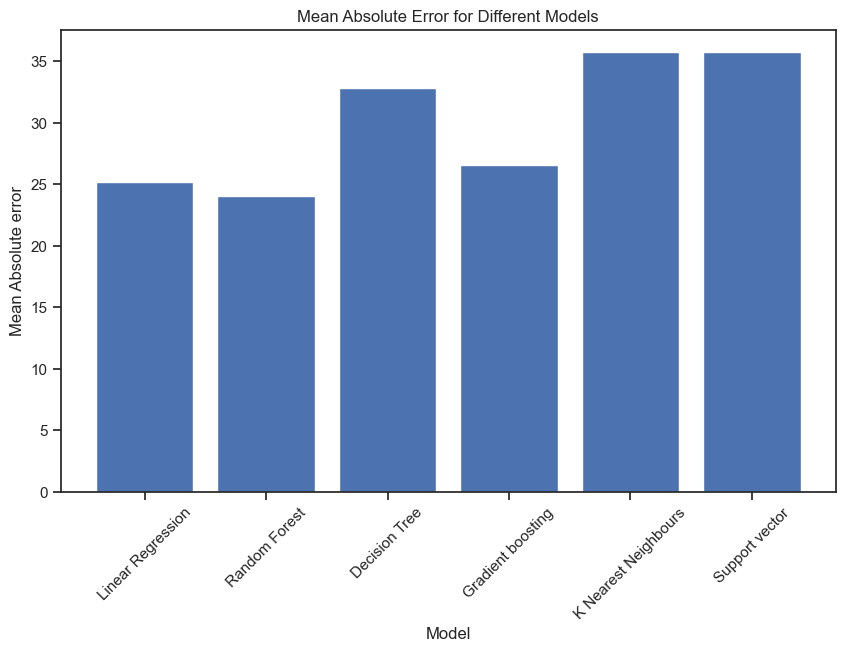

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(categories, values_mae)
plt.xlabel('Model')
plt.ylabel('Mean Absolute error')
plt.title('Mean Absolute Error for Different Models')
plt.xticks(rotation=45)
plt.show()

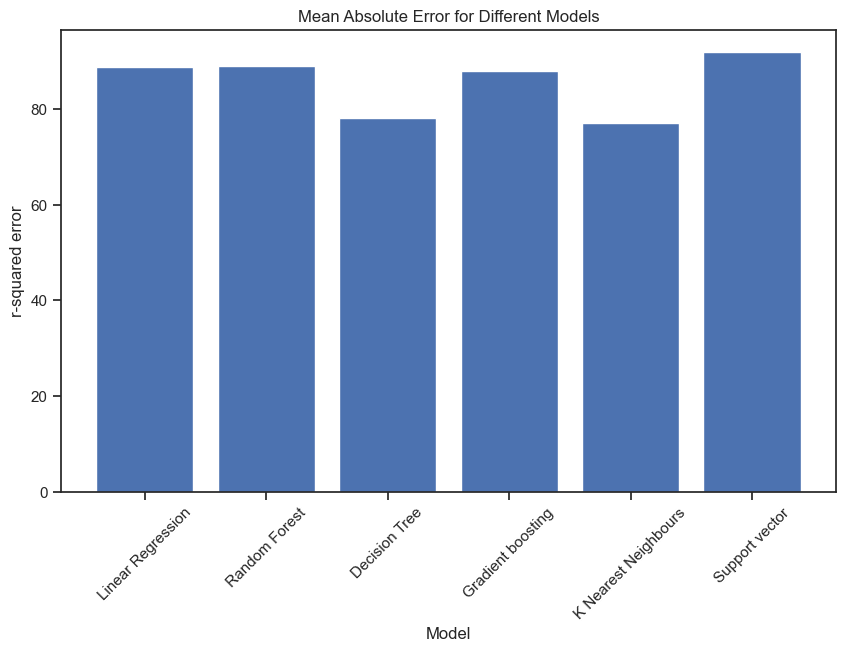

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(categories, values_r2)
plt.xlabel('Model')
plt.ylabel('r-squared error')
plt.title('Mean Absolute Error for Different Models')
plt.xticks(rotation=45)
plt.show()

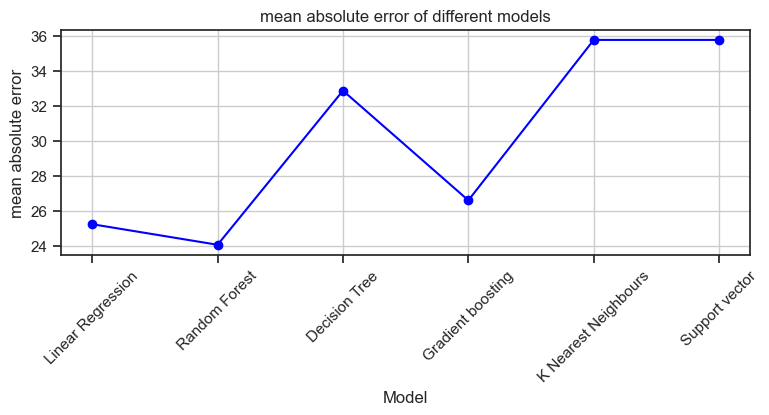

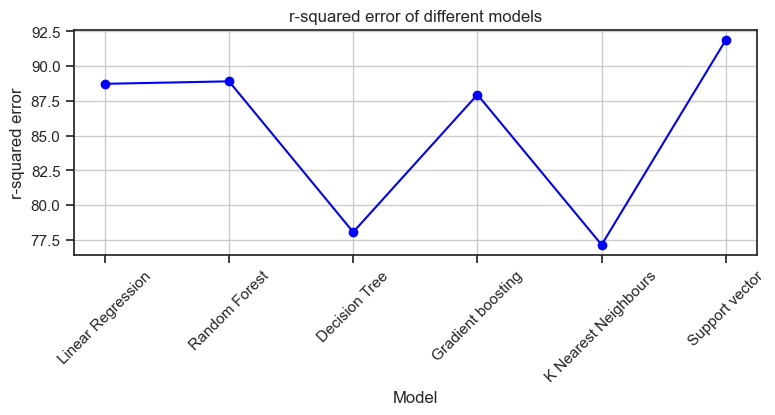

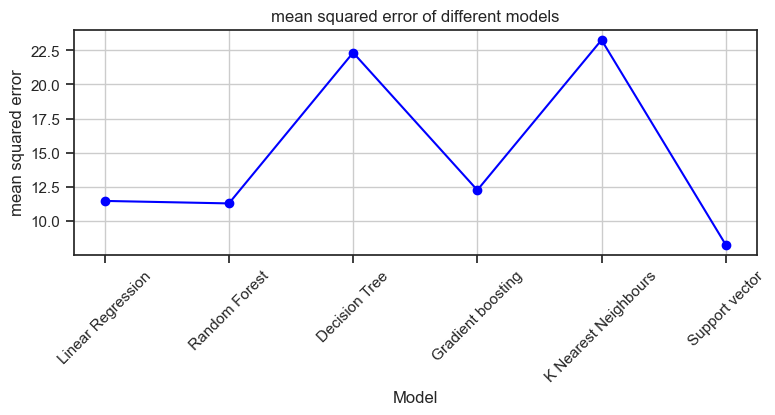

In [ ]:
plt.subplot(2,2,1)
plt.plot(categories, values_mae, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('mean absolute error')
plt.title('mean absolute error of different models')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.subplots_adjust(wspace=0.2,hspace=0.37)

plt.subplot(2,2,2)
plt.plot(categories, values_r2, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('r-squared error')
plt.title('r-squared error of different models')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.subplot(2,2,3)
plt.plot(categories, values_mse, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('mean squared error')
plt.title('mean squared error of different models')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



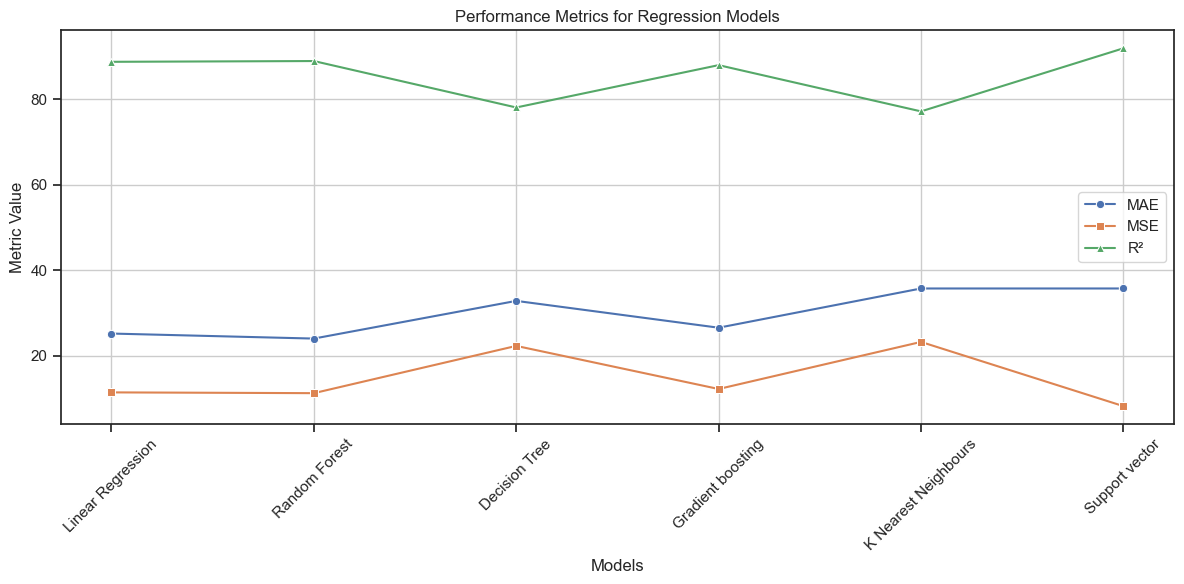

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(y=values_mae,x=categories, marker='o', label="MAE")
sns.lineplot(y=values_mse, x=categories, marker='s', label="MSE")
sns.lineplot(y=values_r2, x=categories, marker='^', label="R²")
plt.xlabel("Models")
plt.ylabel("Metric Value")
plt.title("Performance Metrics for Regression Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After experimentation and evaluation, the support vector Regression model has demonstrated superior performance in predicting wine quality for this dataset. It outperformed other models, achieving the lowest Mean Squared Error (MSE) and the highest R-squared (R2) score. Therefore, the support vector Regression model is recommended for wine quality prediction tasks using this dataset.

In [ ]:
categories=['Linear Regression','Random Forest','Decision Tree','Gradient boosting','K Nearest Neighbours','support vector']
training=[lr_train*100,rf_train*100,dt_train*100,gb_train*100,knn_train*100,svr_train*100]
testing=[lr_test*100,rf_test*100,dt_test*100,gb_test*100,knn_test*100,svr_test*100]

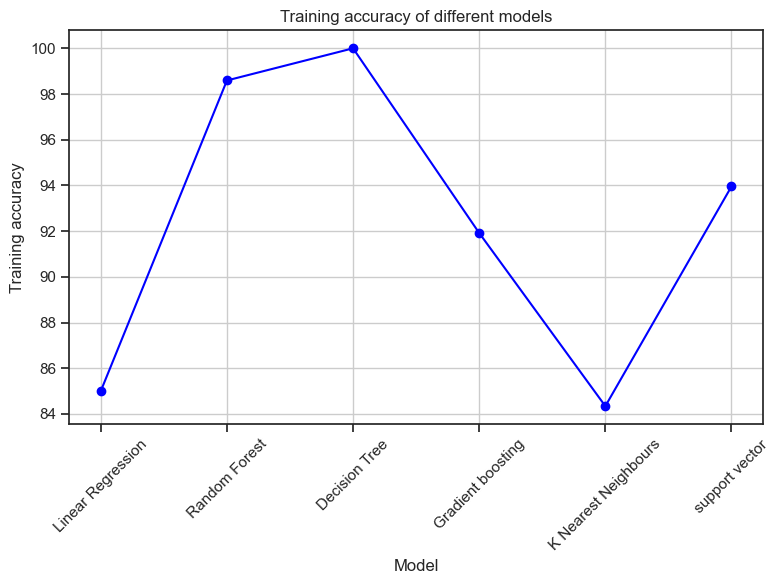

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(categories, training, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('Training accuracy')
plt.title('Training accuracy of different models')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

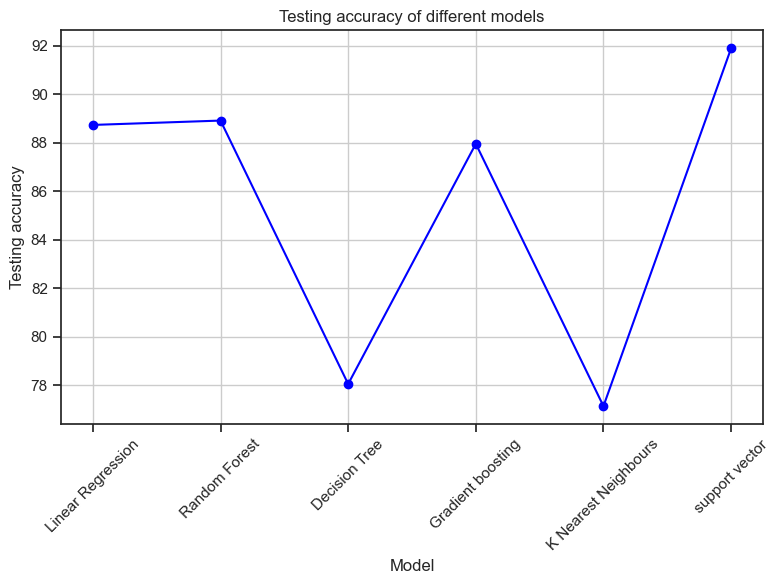

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(categories, testing, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('Testing accuracy')
plt.title('Testing accuracy of different models')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusion

In conclusion, the operations performed on the wine quality prediction dataset have allowed us to build predictive models that can estimate the quality of wines based on various features. We performed data preprocessing, feature engineering, and feature selection to enhance model performance. 
However, it's important to acknowledge certain limitations. Firstly, the quality of the predictions relies heavily on the quality and representativeness of the dataset, and real-world wine quality can be influenced by numerous unmeasured factors. Secondly, while we identified and addressed outliers, their removal may result in the loss of valuable insights or real-world data points. 
Lastly, the applicability of our models in real-world scenarios depends on the domain and the specific use case, as real-world wine quality predictions often involve more complex factors and expert knowledge. Therefore, while our operations provide valuable insights, practical implementations in the wine industry should be approached with careful consideration of these limitations and the broader context of wine quality assessment.